<!-- This should be added to the overrides/main.html and improved-->
<div class="grid cards" markdown>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 488 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M488 261.8C488 403.3 391.1 504 248 504 110.8 504 0 393.2 0 256S110.8 8 248 8c66.8 0 123 24.5 166.3 64.9l-67.5 64.9C258.5 52.6 94.3 116.6 94.3 256c0 86.5 69.1 156.6 153.7 156.6 98.2 0 135-70.4 140.8-106.9H248v-85.3h236.1c2.3 12.7 3.9 24.9 3.9 41.4z"/></svg>
<a href="https://colab.research.google.com/github/AmbiqAI/sleepkit/blob/main/docs/guides/train-detect-model.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    View in Colab
</a>

- <svg xmlns="http://www.w3.org/2000/svg" height="50" width="50" viewBox="0 0 496 512"><!--!Font Awesome Free 6.6.0 by @fontawesome - https://fontawesome.com License - https://fontawesome.com/license/free Copyright 2024 Fonticons, Inc.--><path fill="#2094F3" d="M165.9 397.4c0 2-2.3 3.6-5.2 3.6-3.3 .3-5.6-1.3-5.6-3.6 0-2 2.3-3.6 5.2-3.6 3-.3 5.6 1.3 5.6 3.6zm-31.1-4.5c-.7 2 1.3 4.3 4.3 4.9 2.6 1 5.6 0 6.2-2s-1.3-4.3-4.3-5.2c-2.6-.7-5.5 .3-6.2 2.3zm44.2-1.7c-2.9 .7-4.9 2.6-4.6 4.9 .3 2 2.9 3.3 5.9 2.6 2.9-.7 4.9-2.6 4.6-4.6-.3-1.9-3-3.2-5.9-2.9zM244.8 8C106.1 8 0 113.3 0 252c0 110.9 69.8 205.8 169.5 239.2 12.8 2.3 17.3-5.6 17.3-12.1 0-6.2-.3-40.4-.3-61.4 0 0-70 15-84.7-29.8 0 0-11.4-29.1-27.8-36.6 0 0-22.9-15.7 1.6-15.4 0 0 24.9 2 38.6 25.8 21.9 38.6 58.6 27.5 72.9 20.9 2.3-16 8.8-27.1 16-33.7-55.9-6.2-112.3-14.3-112.3-110.5 0-27.5 7.6-41.3 23.6-58.9-2.6-6.5-11.1-33.3 2.6-67.9 20.9-6.5 69 27 69 27 20-5.6 41.5-8.5 62.8-8.5s42.8 2.9 62.8 8.5c0 0 48.1-33.6 69-27 13.7 34.7 5.2 61.4 2.6 67.9 16 17.7 25.8 31.5 25.8 58.9 0 96.5-58.9 104.2-114.8 110.5 9.2 7.9 17 22.9 17 46.4 0 33.7-.3 75.4-.3 83.6 0 6.5 4.6 14.4 17.3 12.1C428.2 457.8 496 362.9 496 252 496 113.3 383.5 8 244.8 8zM97.2 352.9c-1.3 1-1 3.3 .7 5.2 1.6 1.6 3.9 2.3 5.2 1 1.3-1 1-3.3-.7-5.2-1.6-1.6-3.9-2.3-5.2-1zm-10.8-8.1c-.7 1.3 .3 2.9 2.3 3.9 1.6 1 3.6 .7 4.3-.7 .7-1.3-.3-2.9-2.3-3.9-2-.6-3.6-.3-4.3 .7zm32.4 35.6c-1.6 1.3-1 4.3 1.3 6.2 2.3 2.3 5.2 2.6 6.5 1 1.3-1.3 .7-4.3-1.3-6.2-2.2-2.3-5.2-2.6-6.5-1zm-11.4-14.7c-1.6 1-1.6 3.6 0 5.9 1.6 2.3 4.3 3.3 5.6 2.3 1.6-1.3 1.6-3.9 0-6.2-1.4-2.3-4-3.3-5.6-2z"/></svg>
<a href="https://github.com/AmbiqAI/sleepkit/blob/main/docs/guides/train-detect-model.ipynb" class="md-content__button md-icon" style="color: #2094F3;">
    GitHub source
</a>

</div>

# Train Sleep Detection Model

__Date created:__ 2024/10/02

__Last Modified:__ 2024/10/02 

__Description:__ Train a simple wrist-based sleep detection model using accelerometer data.

## Overview 

In this guide, we will train a small TCN network to detect sleep and wake stages using accelerometer data collected from the wrist.

__Input__

- **Sensor**: IMU
- **Location**: Wrist
- **Sampling Rate**: 0.2 Hz
- **Frame Size**: 60 seconds

__Class Mapping__

Identify activity into one of two categories: SLEEP, AWAKE.

| Base Class     | Target Class | Label                     |
| -------------- | ------------ | ------------------------- |
| 0-WAKE         | 0            | WAKE                      |
| 1-SLEEP        | 1            | SLEEP                     |

__Datasets__

- **[CMIDSS](https://ambiqai.github.io/sleepkit/datasets/cmidss/)**: The Child Mind Institute - Detect Sleep States (CMIDSS) dataset comprises 300 subjects with over 500 multi-day recordings of wrist-worn accelerometer data annotated with two event types: onset, the beginning of sleep, and wakeup, the end of sleep.


## Setup

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import IPython
import contextlib
import tempfile
from pathlib import Path
import keras
import helia_edge as helia
import sleepkit as sk

/workspaces/sleepkit/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# Be sure to set the dataset path to the correct location
datasets_dir = Path(os.getenv('SK_DATASET_PATH', '../../datasets'))

plot_theme = sk.utils.dark_theme
helia.utils.silence_tensorflow()
sk.utils.setup_plotting(plot_theme)
logger = helia.utils.setup_logger(__name__)

## Configure datasets

We are going to train our model using the [CMIDSS Dataset(https://ambiqai.github.io/sleepkit/datasets/cmidss/). This dataset uses the slug __cmidss__ within sleepKIT. We will download the dataset if it is not already available.

In [3]:
datasets = [sk.NamedParams(
    name="cmidss",
    params=dict(
        path=datasets_dir / "cmidss",
    )
)]

## Target classes

For this task, we are going to simply classify the data into two classes: SLEEP and AWAKE. 

In [4]:
class_map = {
    sk.SleepStage.wake: 0,
    sk.SleepStage.stage1: 1,
    sk.SleepStage.stage2: 1,
    sk.SleepStage.stage3: 1,
    sk.SleepStage.stage4: 1,
    sk.SleepStage.rem: 1,
}

class_names = ["WAKE", "SLEEP"]

## Feature set

From the dataset, we will create a feature set using the [FS-W-A-5 features](../features/fs_w_a_5.md). This feature set computes 5 features over 60-second windows captured from the accelerometer sensor collected on the wrist. The **CMIDSS** dataset already provides accelerometer averaged over 5 secods (i.e. Fs=0.2 Hz). Therefore, we will use a frame size of 12 to capture 60 seconds of data (i.e. 6 samples at 0.2 Hz) with a 50% overlap.

In [5]:
feature = dict(
    name="FS-W-A-5",
    sampling_rate=0.2,
    frame_size=12,
    loader="hdf5",
    feat_key="features",
    label_key="detect_labels",
    mask_key="mask",
    feat_cols=None,
    save_path=datasets_dir / "store" / "fs-w-a-5-60",
    params={},
)

## Define TCN model architecture

For this task, we are going to leverage a customized __TCN__ model architecture that is smaller and can handle 1D signals. The model consists of 4 TCN blocks with a depth of 1. Each block leverages dilated depthwise-separable convolutions along with inverted expansion and squeeze and excitation layers. The model is followed by a 1D convolutional layer and a final dense layer for regression. Unlike vision tasks, we leverage larger kernel sizes and strides to capture temporal dependencies in the signal.

In [6]:
architecture = sk.NamedParams(
    name="tcn",
    params=dict(
        input_kernel=[1, 5],
        input_norm="batch",
        blocks=[
            dict(depth=1, branch=1, filters=16, kernel=(1, 5), dilation=[1, 1], dropout=0.10, ex_ratio=1, se_ratio=4, norm="batch"),
            dict(depth=1, branch=1, filters=32, kernel=(1, 5), dilation=[1, 2], dropout=0.10, ex_ratio=1, se_ratio=4, norm="batch"),
            dict(depth=1, branch=1, filters=48, kernel=(1, 5), dilation=[1, 4], dropout=0.10, ex_ratio=1, se_ratio=4, norm="batch"),
            dict(depth=1, branch=1, filters=64, kernel=(1, 5), dilation=[1, 8], dropout=0.10, ex_ratio=1, se_ratio=4, norm="batch")
        ],
        output_kernel=(1, 5),
        include_top=True,
        use_logits=True,
        model_name="tcn"
    )
)

## Task configuration

Here we provide the complete configuration for the task. This includes the dataset configuration, features, model architecture, and training parameters.

In [7]:
params = sk.TaskParams(
    name="sk-detect",
    job_dir=Path(tempfile.gettempdir()) / "sk-detect",
    verbose=1,

    datasets=datasets,

    feature=feature,
    sampling_rate=0.0083333,
    frame_size=240,

    num_classes=len(class_names),
    class_map=class_map,
    class_names=class_names,

    samples_per_subject=100,
    val_samples_per_subject=100,
    test_samples_per_subject=50,

    val_size=4000,
    test_size=2500,

    val_subjects=0.20,
    batch_size=128,
    buffer_size=10000,
    epochs=200,
    steps_per_epoch=25,
    val_steps_per_epoch=25,
    val_metric="loss",
    lr_rate=1e-3,
    lr_cycles=1,
    label_smoothing=0,

    test_metric="f1",
    test_metric_threshold=0.02,
    tflm_var_name="sk_detect_flatbuffer",
    tflm_file="sk_detect_flatbuffer.h",

    backend="pc",
    display_report=False,

    model_file="model.keras",
    use_logits=False,
    architecture=architecture
)

## Load detect task 

sleepKIT provides a __TaskFactory__ that includes a number ready-to-use tasks. Each task provides methods for training, evaluating, exporting, and demoing. We will grab the __detect__ task and configure it for our use case.

In [8]:
task = sk.TaskFactory.get("detect")

## Download the datasets

We will download the datasets using the `sleepkit` library. If already downloaded, this step will be skipped.

In [9]:
task.download(params=params)

## Generate the features

Next, we will generate the features from the given dataset. The features will be generated using the `fs_w_a_5` feature set.

Once the command finishes, the feature set will be saved in the `feature.save_path` directory. These features will be stored in HDF5 files with one file per subject. Each HDF5 file will include the following entries:

- `/features`: Time x Feature tensor (fp32). Features are computed over windows of sensor data.
- `/mask`: Time x Mask tensor (bool). Mask indicates valid feature values.
- `/detect_labels`: Time x Label (int). Labels are awake/sleep.

In [10]:
task.feature(params=params)

Gen features for cmidss: 100%|██████████| 277/277 [02:02<00:00,  2.27it/s]


## Visualize the model

Lets quickly instantiate and visualize the model.

In [11]:
model = helia.models.tcn.TcnModel.model_from_params(
    inputs=keras.Input(shape=(params.frame_size, 5), name="inputs"),
    params=architecture.params,
    num_classes=len(class_names)
)
model.summary(layer_range=('inputs', model.layers[10].name))

I0000 00:00:1765844770.008698    4340 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15543 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ inputs (InputLayer) │ (None, 240, 5)    │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 1, 240, 5) │          0 │ inputs[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ENC_CN              │ (None, 1, 240, 5) │         25 │ reshape[0][0]     │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ ENC_BN              │ (None, 1, 240, 5) │         20 │ ENC_CN[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_DW_B1_CN      │ (None, 1, 240, 5) │         25 │ ENC_BN[0][0]      │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_DW_B1_BN      │ (None, 1, 240, 5) │         20 │ B1_D1_DW_B1_CN[0… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_DW_ACT        │ (None, 1, 240, 5) │          0 │ B1_D1_DW_B1_BN[0… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_SE_pool       │ (None, 1, 1, 5)   │          0 │ B1_D1_DW_ACT[0][… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_SE_sq         │ (None, 1, 1, 1)   │          6 │ B1_D1_SE_pool[0]… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_SE_sq.act     │ (None, 1, 1, 1)   │          0 │ B1_D1_SE_sq[0][0] │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_SE_ex         │ (None, 1, 1, 5)   │         10 │ B1_D1_SE_sq.act[… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_SE_ex.act     │ (None, 1, 1, 5)   │          0 │ B1_D1_SE_ex[0][0] │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ B1_D1_SE_ex.mul     │ (None, 1, 240, 5) │          0 │ B1_D1_DW_ACT[0][… │
│ (Multiply)          │                   │            │ B1_D1_SE_ex.act[… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 9,364 (36.58 KB)

 Trainable params: 8,832 (34.50 KB)

 Non-trainable params: 532 (2.08 KB)

## Train the model

At this point, we can train the model from the generated feature set for the sleep detect task. The model will be trained for 200 epochs with a batch size of 128 and a learning rate of 1e-3. The model will be fed a `frame_size` of 240 samples which equates to 120 minutes.

Using the task configuration, we will train the model on the dataset.

Epoch 1/200
 6/25 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - acc: 0.4901 - f1: 0.5407 - iou: 0.2969 - loss: 0.4225

I0000 00:00:1765844782.346690    5271 device_compiler.h:196] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - acc: 0.6108 - f1: 0.6250 - iou: 0.3657 - loss: 0.3908 - val_acc: 0.7313 - val_f1: 0.6215 - val_iou: 0.3675 - val_loss: 0.3326
Epoch 2/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - acc: 0.7354 - f1: 0.7398 - iou: 0.5071 - loss: 0.3144 - val_acc: 0.7313 - val_f1: 0.6215 - val_iou: 0.3675 - val_loss: 0.2935
Epoch 3/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - acc: 0.7997 - f1: 0.7968 - iou: 0.5850 - loss: 0.2693 - val_acc: 0.7332 - val_f1: 0.6204 - val_iou: 0.3666 - val_loss: 0.2586
Epoch 4/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8198 - f1: 0.8157 - iou: 0.6216 - loss: 0.2346 - val_acc: 0.7313 - val_f1: 0.6215 - val_iou: 0.3676 - val_loss: 0.2293
Epoch 5/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - acc: 0.8415 - f1: 0.8413 - iou: 0.6644 - loss: 0.2039 - val_acc: 0.7332 - val_f1: 0.6204 - val_iou: 0.3666 - val_loss: 0.2039
Epoch 6/200
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - acc: 0.8495 - f1: 0.8511 - iou: 0.6896 - loss: 0.1785 - v

INFO     [TEST SET] acc=96.19%, f1=96.20%, iou=90.84%, loss=0.83%                                      ]8;id=271544;file:///workspaces/sleepkit/sleepkit/tasks/stage/train.py\train.py]8;;\:]8;id=429219;file:///workspaces/sleepkit/sleepkit/tasks/stage/train.py#222\222]8;;\

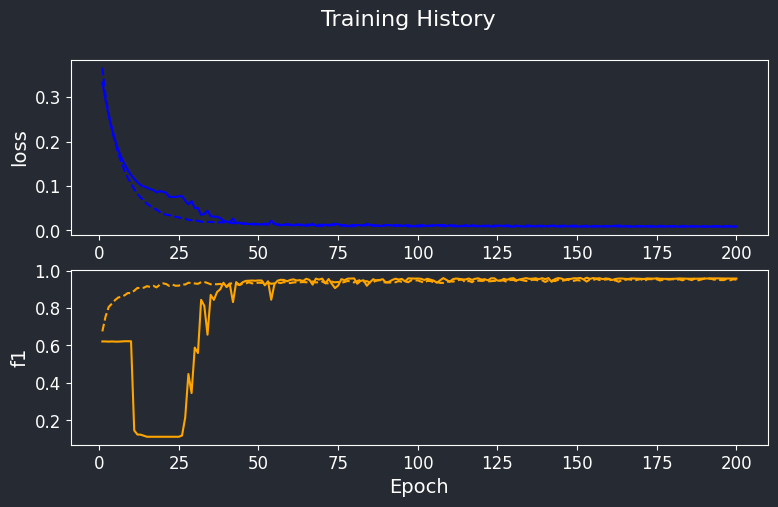

In [12]:
task.train(params)

## Model evaluation

Now that we have trained the model, we will evaluate the model on the test dataset. Similar to training, we will provide the high-level configuration to the task process.

In [13]:
task.evaluate(params)

Subject: 100%|██████████| 56/56 [00:19<00:00,  2.90it/s]


INFO     Testing Results                                                                            ]8;id=701904;file:///workspaces/sleepkit/sleepkit/tasks/stage/evaluate.py\evaluate.py]8;;\:]8;id=219087;file:///workspaces/sleepkit/sleepkit/tasks/stage/evaluate.py#130\130]8;;\

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - acc: 0.9654 - f1: 0.9657 - iou: 0.9123 - loss: 0.0076


INFO     [TEST SET] acc=95.87%, f1=95.91%, iou=89.27%, loss=0.85%                                   ]8;id=326865;file:///workspaces/sleepkit/sleepkit/tasks/stage/evaluate.py\evaluate.py]8;;\:]8;id=326477;file:///workspaces/sleepkit/sleepkit/tasks/stage/evaluate.py#132\132]8;;\

## Confusion matrix

Let's visualize the confusion matrix to understand the model's performance on each class.

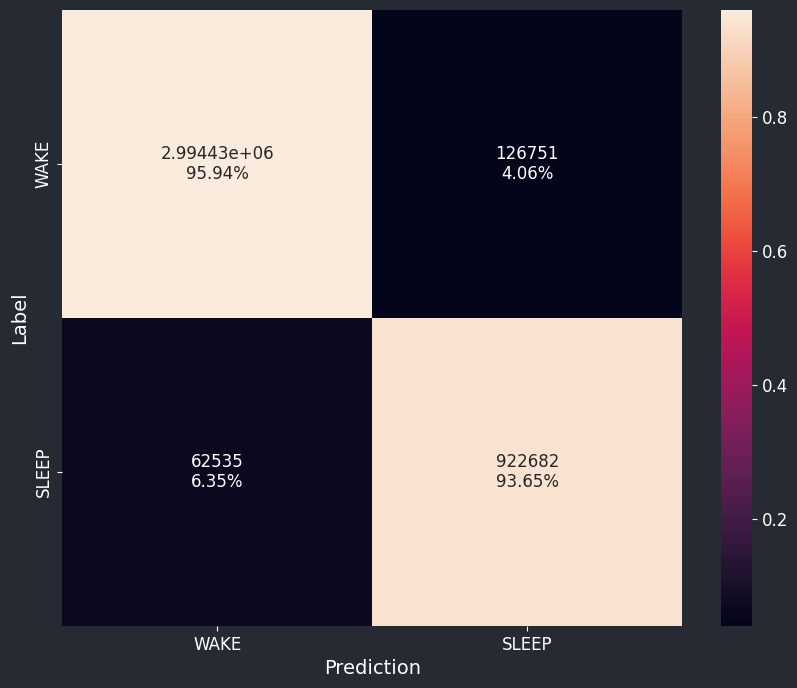

In [14]:
IPython.display.Image(filename=params.job_dir / "confusion_matrix_test.png", width=500)

## Export model to TF Lite / TFLM

Once we have trained and evaluated the model, we need to export the model into a format that can be used for inference on the edge. Currently, we export the model to TensorFlow Lite flatbuffer format. This will also generate a C header file that can be used with TensorFlow Lite for Microcontrollers (TFLM).


### Apply post-training quantization (PTQ)

For running on bare metal, we will perform post-training quantization to convert the model to an 8-bit integer model. The weights and activations will be quantized to 8-bits and biases will be quantized to 32-bits. This will reduce the model size and improve the inference speed.

In [15]:
quantization = sk.QuantizationParams(
    enabled=True,
    format="FP32",
    io_type="float32",
    conversion="CONCRETE",
)
params.quantization = quantization


In [16]:
# TF dumps a lot of info to stdout, so we redirect it to /dev/null
with open(os.devnull, 'w') as devnull:
    with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
        task.export(params)


[12/16/25 00:29:04] WARNING  WARNING:absl:Please consider providing the trackable_obj argument in the  ]8;id=989608;file:///workspaces/sleepkit/.venv/lib/python3.13/site-packages/tensorflow/lite/python/lite.py\lite.py]8;;\:]8;id=294890;file:///workspaces/sleepkit/.venv/lib/python3.13/site-packages/tensorflow/lite/python/lite.py#2203\2203]8;;\
                             from_concrete_functions. Providing without the trackable_obj argument is              
                             deprecated and it will use the deprecated conversion path.                            

I0000 00:00:1765844944.016353    4340 devices.cc:67] Number of eligible GPUs (core count >= 8, compute capability >= 0.0): 1
I0000 00:00:1765844944.016431    4340 single_machine.cc:376] Starting new session
I0000 00:00:1765844944.019835    4340 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15543 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4090, pci bus id: 0000:01:00.0, compute capability: 8.9
W0000 00:00:1765844944.106038    4340 tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
W0000 00:00:1765844944.106051    4340 tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


INFO     [TF METRICS] LOSS=0.2055 ACC=0.9500 F1=0.9506                                                ]8;id=57569;file:///workspaces/sleepkit/sleepkit/tasks/stage/export.py\export.py]8;;\:]8;id=695633;file:///workspaces/sleepkit/sleepkit/tasks/stage/export.py#111\111]8;;\

INFO     [TFL METRICS] LOSS=0.2055 ACC=0.9500 F1=0.9506                                               ]8;id=964165;file:///workspaces/sleepkit/sleepkit/tasks/stage/export.py\export.py]8;;\:]8;id=179562;file:///workspaces/sleepkit/sleepkit/tasks/stage/export.py#112\112]8;;\

INFO     Validation passed (0.00%)                                                                    ]8;id=77837;file:///workspaces/sleepkit/sleepkit/tasks/stage/export.py\export.py]8;;\:]8;id=877141;file:///workspaces/sleepkit/sleepkit/tasks/stage/export.py#120\120]8;;\

## Run inference demo

We will run a demo on the PC to verify that the model is working as expected. The demo will load the model and run inferences across a randomly selected subject. The demo will also provide the model's prediction and the corresponding class name. 

Inference: 100%|██████████| 425/425 [00:14<00:00, 28.87it/s]


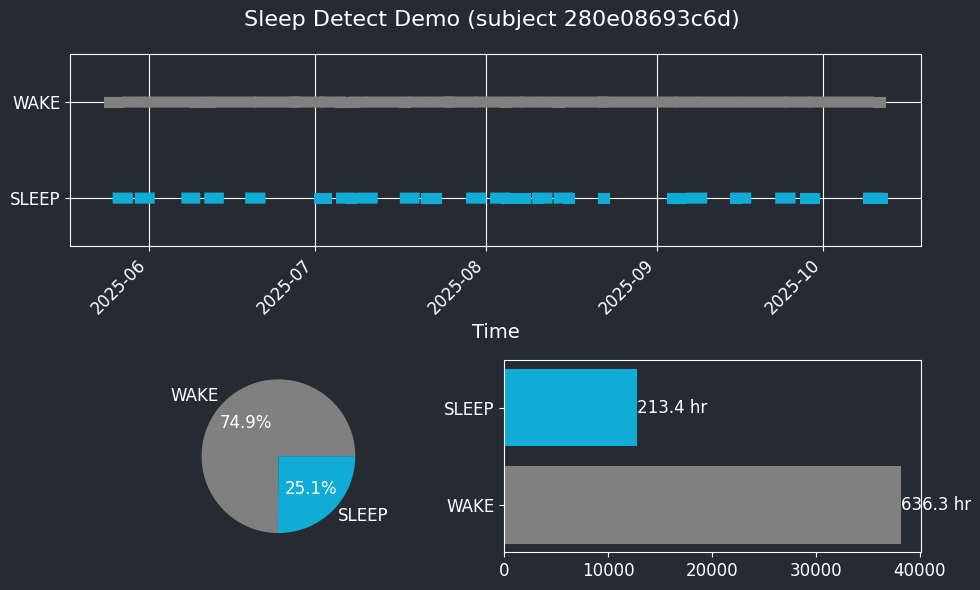

In [18]:
task.demo(params=params)